# Overview of the Developmental Immune cell atlas

In here I will highlight the different compartments of the Developmental Immune cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment (HSC progenitors, Myeloid, Lymphoid and Erythro-Megakaryocytes). I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality. 


In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
#tmpfile = 'h5ad_files/Progenitors_lineage_wilcox_tmp.h5ad'

In [4]:
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas/From_Jesus/results_1707/cell_lines/orthologs/"
alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_top_500_orthologs.txt", sep="\t")

In [5]:
adata = sc.read_h5ad('../h5ad_files/PAN.A01.v01.raw_count.20210429.HSC_IMMUNE.embedding.h5ad')
adata

AnnData object with n_obs × n_vars = 593203 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
    uns: 'leiden', 'scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'scvi_connectivities', 'scvi_distances'

In [6]:
adata.obs["celltype"] = adata.obs["anno_lvl_2_final_clean"].str.replace(r"[()]","").astype('category')


/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
adata.obs["anno_lvl_2_final_clean"].cat.categories

Index(['ABT(ENTRY)', 'AS_DC', 'B1', 'CD4+T', 'CD8+T', 'CD8AA', 'CMP',
       'CYCLING_B', 'CYCLING_DC', 'CYCLING_ILC', 'CYCLING_MEMP', 'CYCLING_MPP',
       'CYCLING_NK', 'CYCLING_PDC', 'CYCLING_T', 'CYCLING_YS_ERY', 'DC1',
       'DC2', 'DC_PROGENITOR', 'DN(P)_T', 'DN(Q)_T', 'DN(early)_T', 'DOUBLET',
       'DOUBLETS_FIBRO_ERY', 'DOUBLET_ERY_B', 'DOUBLET_LYMPHOID_MACROPHAGE',
       'DOUBLET_VSMC_ERYTHROCYTE', 'DP(P)_T', 'DP(Q)_T', 'EARLY_ERY',
       'EARLY_MK', 'EOSINOPHIL_BASOPHIL', 'FIBROBLAST_XVII', 'GMP',
       'HIGH_MITO', 'HSC_MPP', 'ILC2', 'ILC3', 'IMMATURE_B',
       'LANGERHANS_CELLS', 'LARGE_PRE_B', 'LATE_ERY', 'LATE_MK', 'LATE_PRO_B',
       'LMPP_MLP', 'LOW_QUALITY_MACROPHAGE', 'LOW_QUALITY_MID_ERY_(HIGH_RIBO)',
       'LOW_Q_INCONSISTENT', 'MACROPHAGE_ERY', 'MACROPHAGE_IRON_RECYCLING',
       'MACROPHAGE_KUPFFER_LIKE', 'MACROPHAGE_LYVE1_HIGH',
       'MACROPHAGE_MHCII_HIGH', 'MACROPHAGE_PROLIFERATING', 'MACROPHAGE_TREM2',
       'MAST_CELL', 'MATURE_B', 'MEMP', 'MEP', 

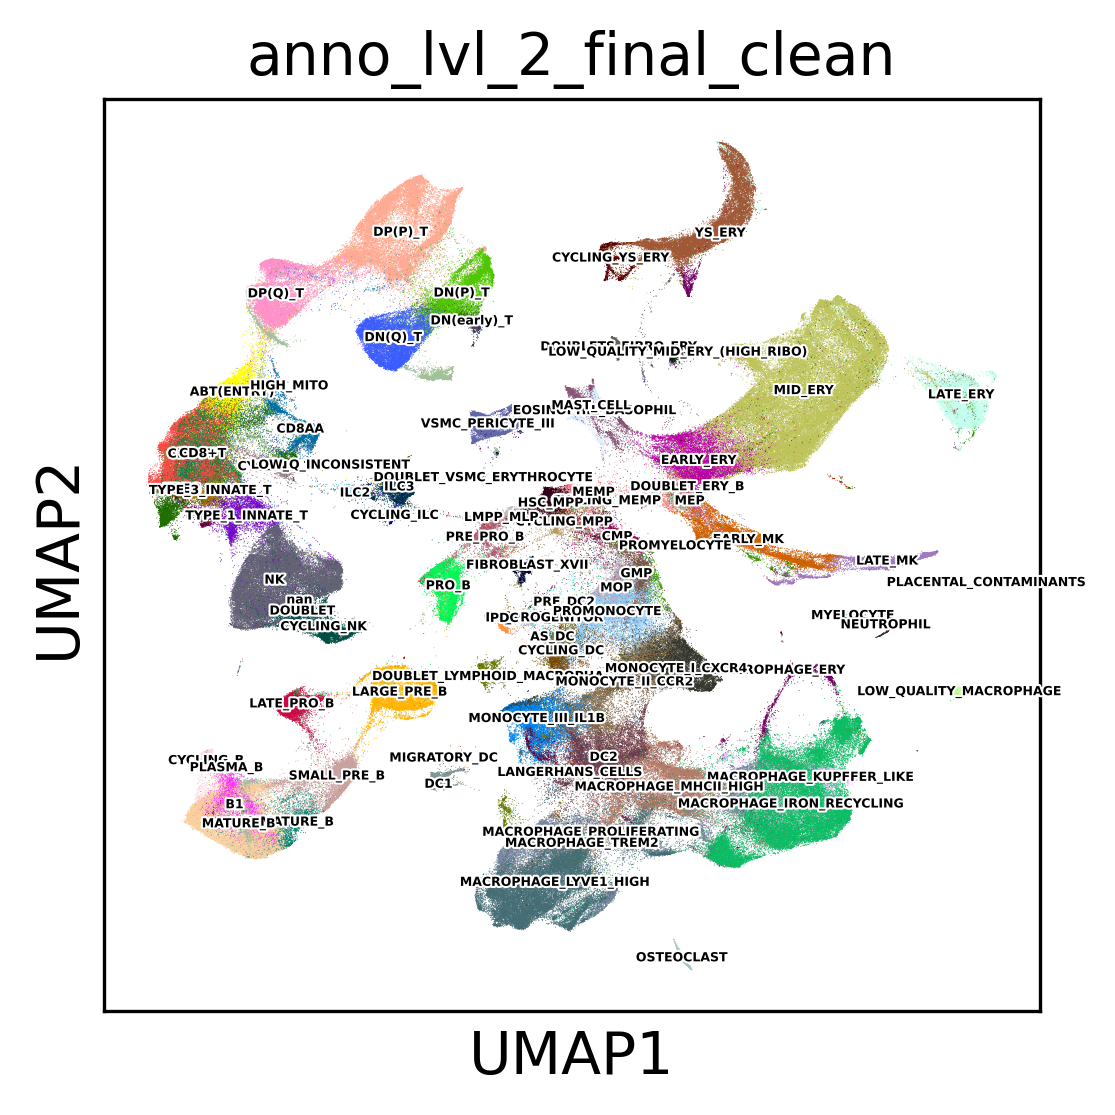

In [8]:
sc.pl.umap(adata, color=["anno_lvl_2_final_clean"],
           legend_loc = 'on data',legend_fontoutline =1,
           legend_fontsize= 3 )

In [9]:
adata_subset = adata[adata.obs['anno_lvl_2_final_clean'].isin([
    ## Progenitors
    'HSC_MPP', 'LMPP_MLP','PRE_PRO_B','DN(early)_T','DN(P)_T',
    'MEMP','MEP', 'EARLY_MK','CMP','GMP','PROMONOCYTE','PROMYELOCYTE',
    ## Lymphoid
    'PRO_B', 'LATE_PRO_B','LARGE_PRE_B', 'SMALL_PRE_B', 'IMMATURE_B',
    'MATURE_B','B1','PLASMA_B','PRE_PRO_B','NK','DN(early)_T','DN(Q)_T',
    'DN(P)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','ILC2','ILC3','CD4+T',
    'CD8+T','TREG','TYPE_1_INNATE_T', 'TYPE_3_INNATE_T','CD8AA',
    ## Myeloid
    'CMP','GMP','PROMYELOCYTE','MYELOCYTE','NEUTROPHIL','MOP',
    'PROMONOCYTE','MONOCYTE_I_CXCR4','MONOCYTE_II_CCR2',
    'MONOCYTE_III_IL1B','DC_PROGENITOR','PDC','AS_DC','PRE_DC2','DC2',
    'DC1','MIGRATORY_DC','LANGERHANS_CELLS','EOSINOPHIL_BASOPHIL',
    'MAST_CELL','MACROPHAGE_LYVE1_HIGH','MACROPHAGE_IRON_RECYCLING',
    'MACROPHAGE_MHCII_HIGH','MACROPHAGE_KUPFFER_LIKE','MACROPHAGE_TREM2',
    'OSTEOCLAST',
    ## MegaK Ery
    'MEMP','MEP','EARLY_ERY','MID_ERY','LATE_ERY','YS_ERY','EARLY_MK',
    'LATE_MK','VSMC_PERICYTE_III','MACROPHAGE_ERY'
    ])]

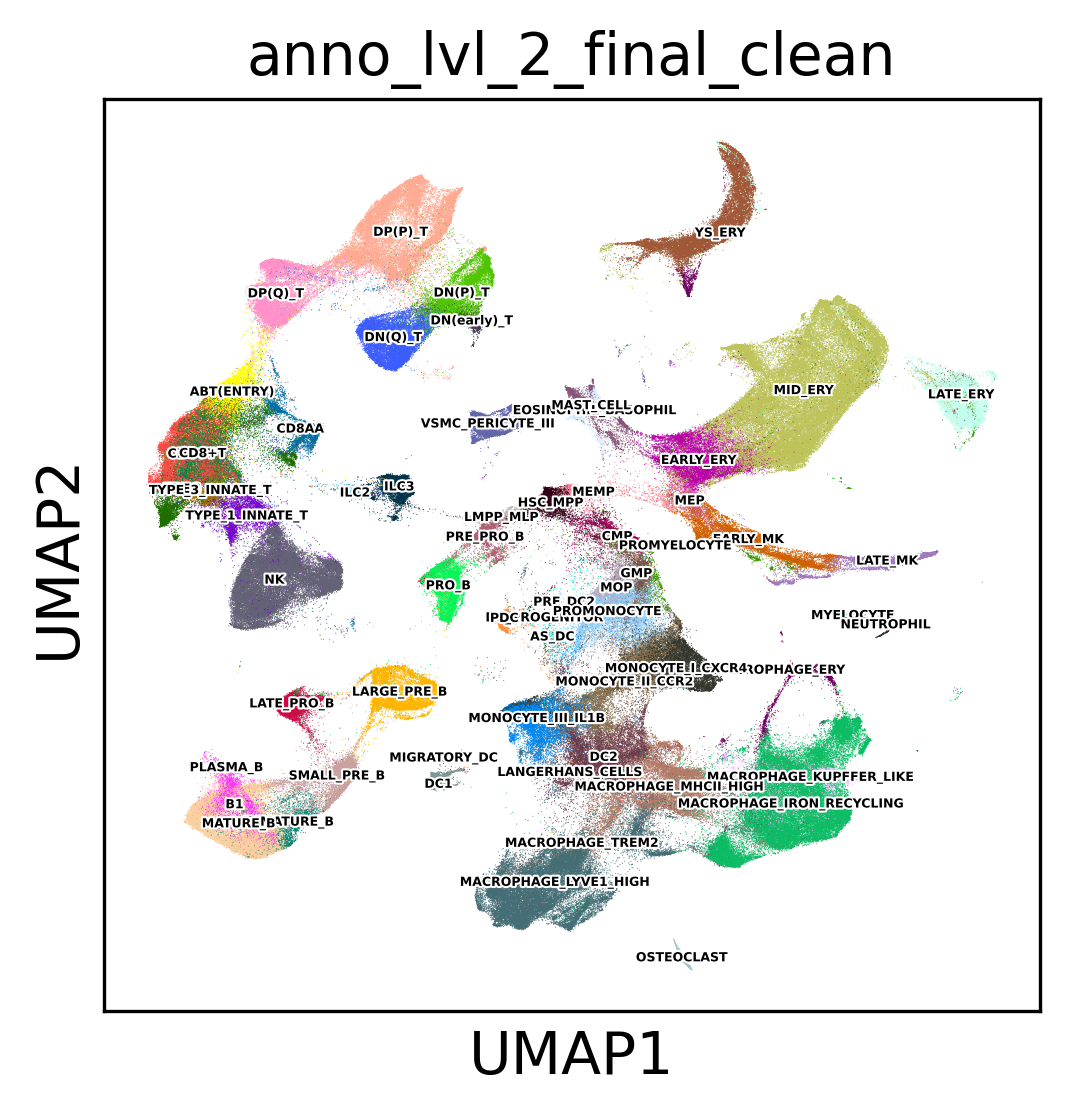

In [10]:
sc.pl.umap(adata_subset, color=["anno_lvl_2_final_clean"],
           legend_loc = 'on data',legend_fontoutline =1,
           legend_fontsize= 3 )

In [11]:
adata = adata_subset
del(adata_subset)

## Main compartment annotation

In [12]:
anno_lineage = {
    ## Progenitors
    'HSC_MPP' : "Progenitors",
    'LMPP_MLP' : "Progenitors",
    'PRE_PRO_B' : "Progenitors",
    'DN(early)_T' : "Progenitors",
    'DN(P)_T' : "Progenitors",
    'MEMP' : "Progenitors",
    'MEP' : "Progenitors",
    'EARLY_MK' : "Progenitors",
    'CMP' : "Progenitors",
    'GMP'  : "Progenitors",
    'PROMONOCYTE'  : "Progenitors",
    'PROMYELOCYTE' : "Progenitors",
    ## Lymphoid
    'PRO_B' : "Lymphoid",
    'LATE_PRO_B' : "Lymphoid",
    'LARGE_PRE_B' : "Lymphoid",
    'SMALL_PRE_B' : "Lymphoid",
    'IMMATURE_B' : "Lymphoid",
    'MATURE_B' : "Lymphoid",
    'B1' : "Lymphoid",
    'PLASMA_B' : "Lymphoid",
    'PRE_PRO_B' : "Lymphoid",
    'NK' : "Lymphoid",
    'DN(early)_T' : "Lymphoid",
    'DN(Q)_T' : "Lymphoid",
    'DN(P)_T' : "Lymphoid",
    'DP(P)_T' : "Lymphoid",
    'DP(Q)_T' : "Lymphoid",
    'ABT(ENTRY)' : "Lymphoid",
    'ILC2' : "Lymphoid",
    'ILC3' : "Lymphoid",
    'CD4+T' : "Lymphoid",
    'CD8+T' : "Lymphoid",
    'TREG' : "Lymphoid",
    'TYPE_1_INNATE_T' : "Lymphoid",
    'TYPE_3_INNATE_T' : "Lymphoid",
    'CD8AA': "Lymphoid",
    ## Myeloid
    'CMP': "Myeloid",
    'GMP': "Myeloid",
    'PROMYELOCYTE': "Myeloid",
    'MYELOCYTE': "Myeloid",
    'NEUTROPHIL': "Myeloid",
    'MOP': "Myeloid",
    'PROMONOCYTE': "Myeloid",
    'MONOCYTE_I_CXCR4': "Myeloid",
    'MONOCYTE_II_CCR2': "Myeloid",
    'MONOCYTE_III_IL1B': "Myeloid",
    'DC_PROGENITOR' : "Myeloid",
    'PDC': "Myeloid",
    'AS_DC': "Myeloid",
    'PRE_DC2': "Myeloid",
    'DC2': "Myeloid",
    'DC1': "Myeloid",
    'MIGRATORY_DC': "Myeloid",
    'LANGERHANS_CELLS': "Myeloid",
    'EOSINOPHIL_BASOPHIL': "Myeloid",
    'MAST_CELL': "Myeloid",
    'MACROPHAGE_LYVE1_HIGH': "Myeloid",
    'MACROPHAGE_IRON_RECYCLING': "Myeloid",
    'MACROPHAGE_MHCII_HIGH': "Myeloid",
    'MACROPHAGE_KUPFFER_LIKE': "Myeloid",
    'MACROPHAGE_TREM2': "Myeloid",
    'OSTEOCLAST': "Myeloid",
    ## MegaK Ery
    'MEMP' : 'MegaK/Ery',
    'MEP': 'MegaK/Ery',
    'EARLY_ERY': 'MegaK/Ery',
    'MID_ERY': 'MegaK/Ery',
    'LATE_ERY': 'MegaK/Ery',
    'YS_ERY': 'MegaK/Ery',
    'EARLY_MK': 'MegaK/Ery',
    'LATE_MK': 'MegaK/Ery',
    'VSMC_PERICYTE_III': 'MegaK/Ery',
    'MACROPHAGE_ERY': 'MegaK/Ery'
}

## Progenitors

In [13]:
anno_Progenitors = {
    ## Progenitors
    'HSC_MPP' : "HSC_MPP",
    'LMPP_MLP' : "Lymphoid Progenitors",
    'PRE_PRO_B' : "Lymphoid Progenitors",
    'DN(early)_T' : "Lymphoid Progenitors",
    'DN(P)_T' : "Lymphoid Progenitors",
    'MEMP' : "Myeloid Progenitors",
    'MEP' : "Myeloid Progenitors",
    'EARLY_MK' : "Myeloid Progenitors",
    'CMP' : "Myeloid Progenitors",
    'GMP'  : "Myeloid Progenitors",
    'PROMONOCYTE'  : "Myeloid Progenitors",
    'PROMYELOCYTE' : "Myeloid Progenitors",
}

In [14]:
adata.obs['Progenitors_anno'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['Progenitors_anno'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_Progenitors)
.astype('category')
)

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [15]:
x = alpha_vals[alpha_vals["line"] == "HSC_progenitors"]
x['cell'] = x['cell'].str.replace(r"_HSC_progenitors","").astype('category')
#x

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
adata.obs["alpha"] = float('NaN')
for i in x["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(x["α"][x["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


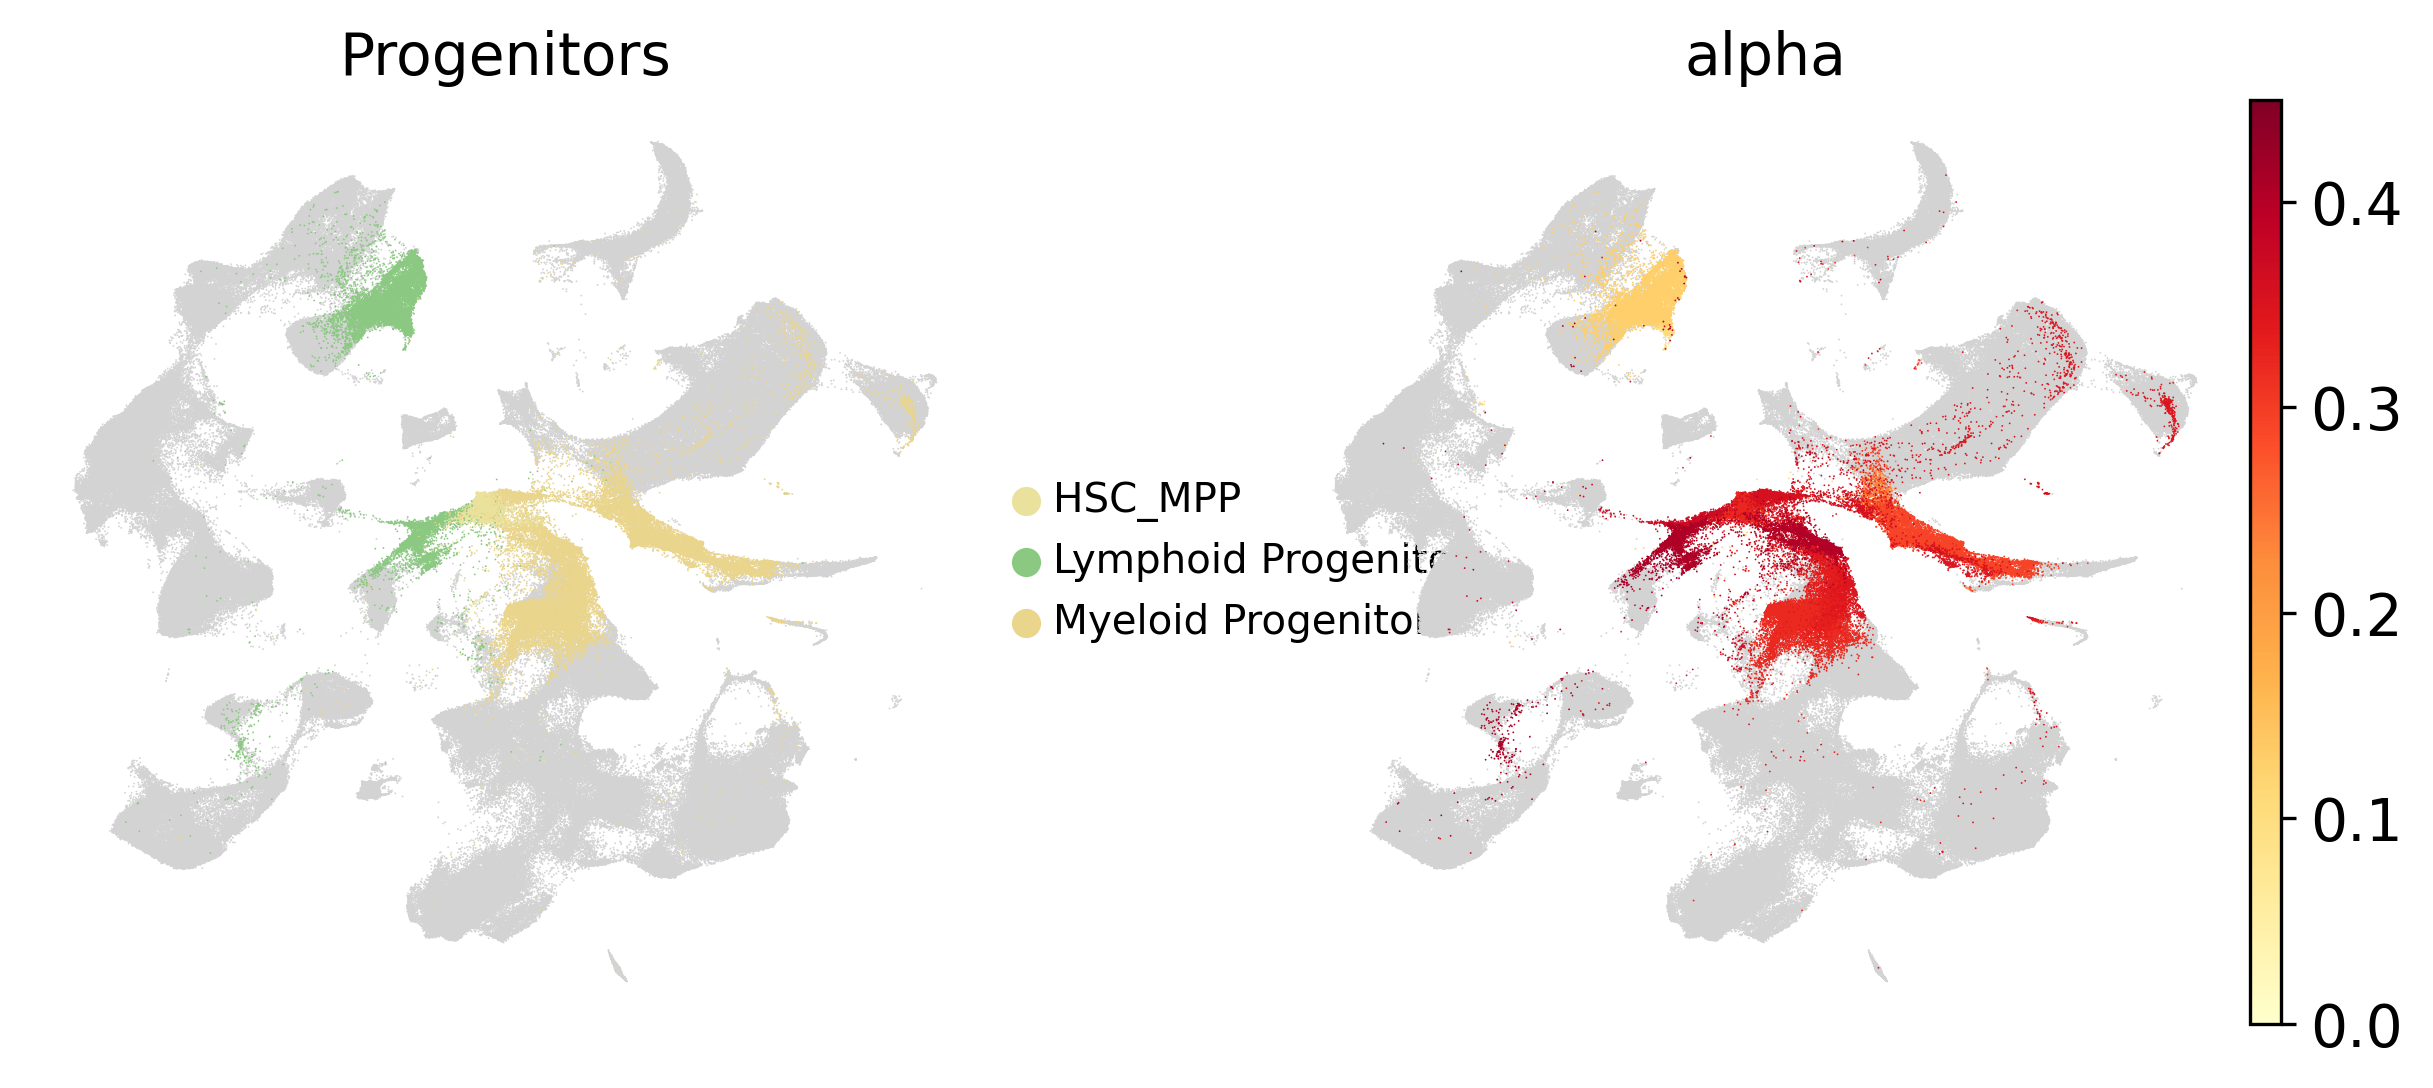

In [17]:
sc.pl.umap(adata, color=["Progenitors_anno", "alpha"],save= "Progenitors_overview.svg",
           palette= {'HSC_MPP' : "#eae29c","Lymphoid Progenitors":"#8bc982","Myeloid Progenitors":"#ead58d"},
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Progenitors", size = 0.75,
           legend_fontsize= 'x-small', na_in_legend = False )

## Lymphoid

In [18]:
anno_Lymphoid = {
        ## Lymphoid
    'PRO_B' : "B cells",
    'LATE_PRO_B' : "B cells",
    'LARGE_PRE_B' : "B cells",
    'SMALL_PRE_B' : "B cells",
    'IMMATURE_B' : "B cells",
    'MATURE_B' : "B cells",
    'B1' : "B cells",
    'PLASMA_B' : "B cells",
    'PRE_PRO_B' : "B cells",
    'NK' : "Innate",
    'DN(early)_T' : "T cells",
    'DN(Q)_T' : "T cells",
    'DN(P)_T' : "T cells",
    'DP(P)_T' : "T cells",
    'DP(Q)_T' : "T cells",
    'ABT(ENTRY)' : "T cells",
    'ILC2' : "Innate",
    'ILC3' : "Innate",
    'CD4+T' : "T cells",
    'CD8+T' : "T cells",
    'TREG' : "T cells",
    'TYPE_1_INNATE_T' : "Innate",
    'TYPE_3_INNATE_T' : "Innate",
    'CD8AA': "T cells"    
}

In [19]:
adata.obs['Lymphoid_anno'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['Lymphoid_anno'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_Lymphoid)
.astype('category')
)

In [20]:
x = alpha_vals[alpha_vals["line"] == "Lymphoid_ALL"]
x['cell'] = x['cell'].str.replace(r"_Lymphoid_ALL","").astype('category')
#x

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
adata.obs["alpha"] = float('NaN')
for i in x["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(x["α"][x["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


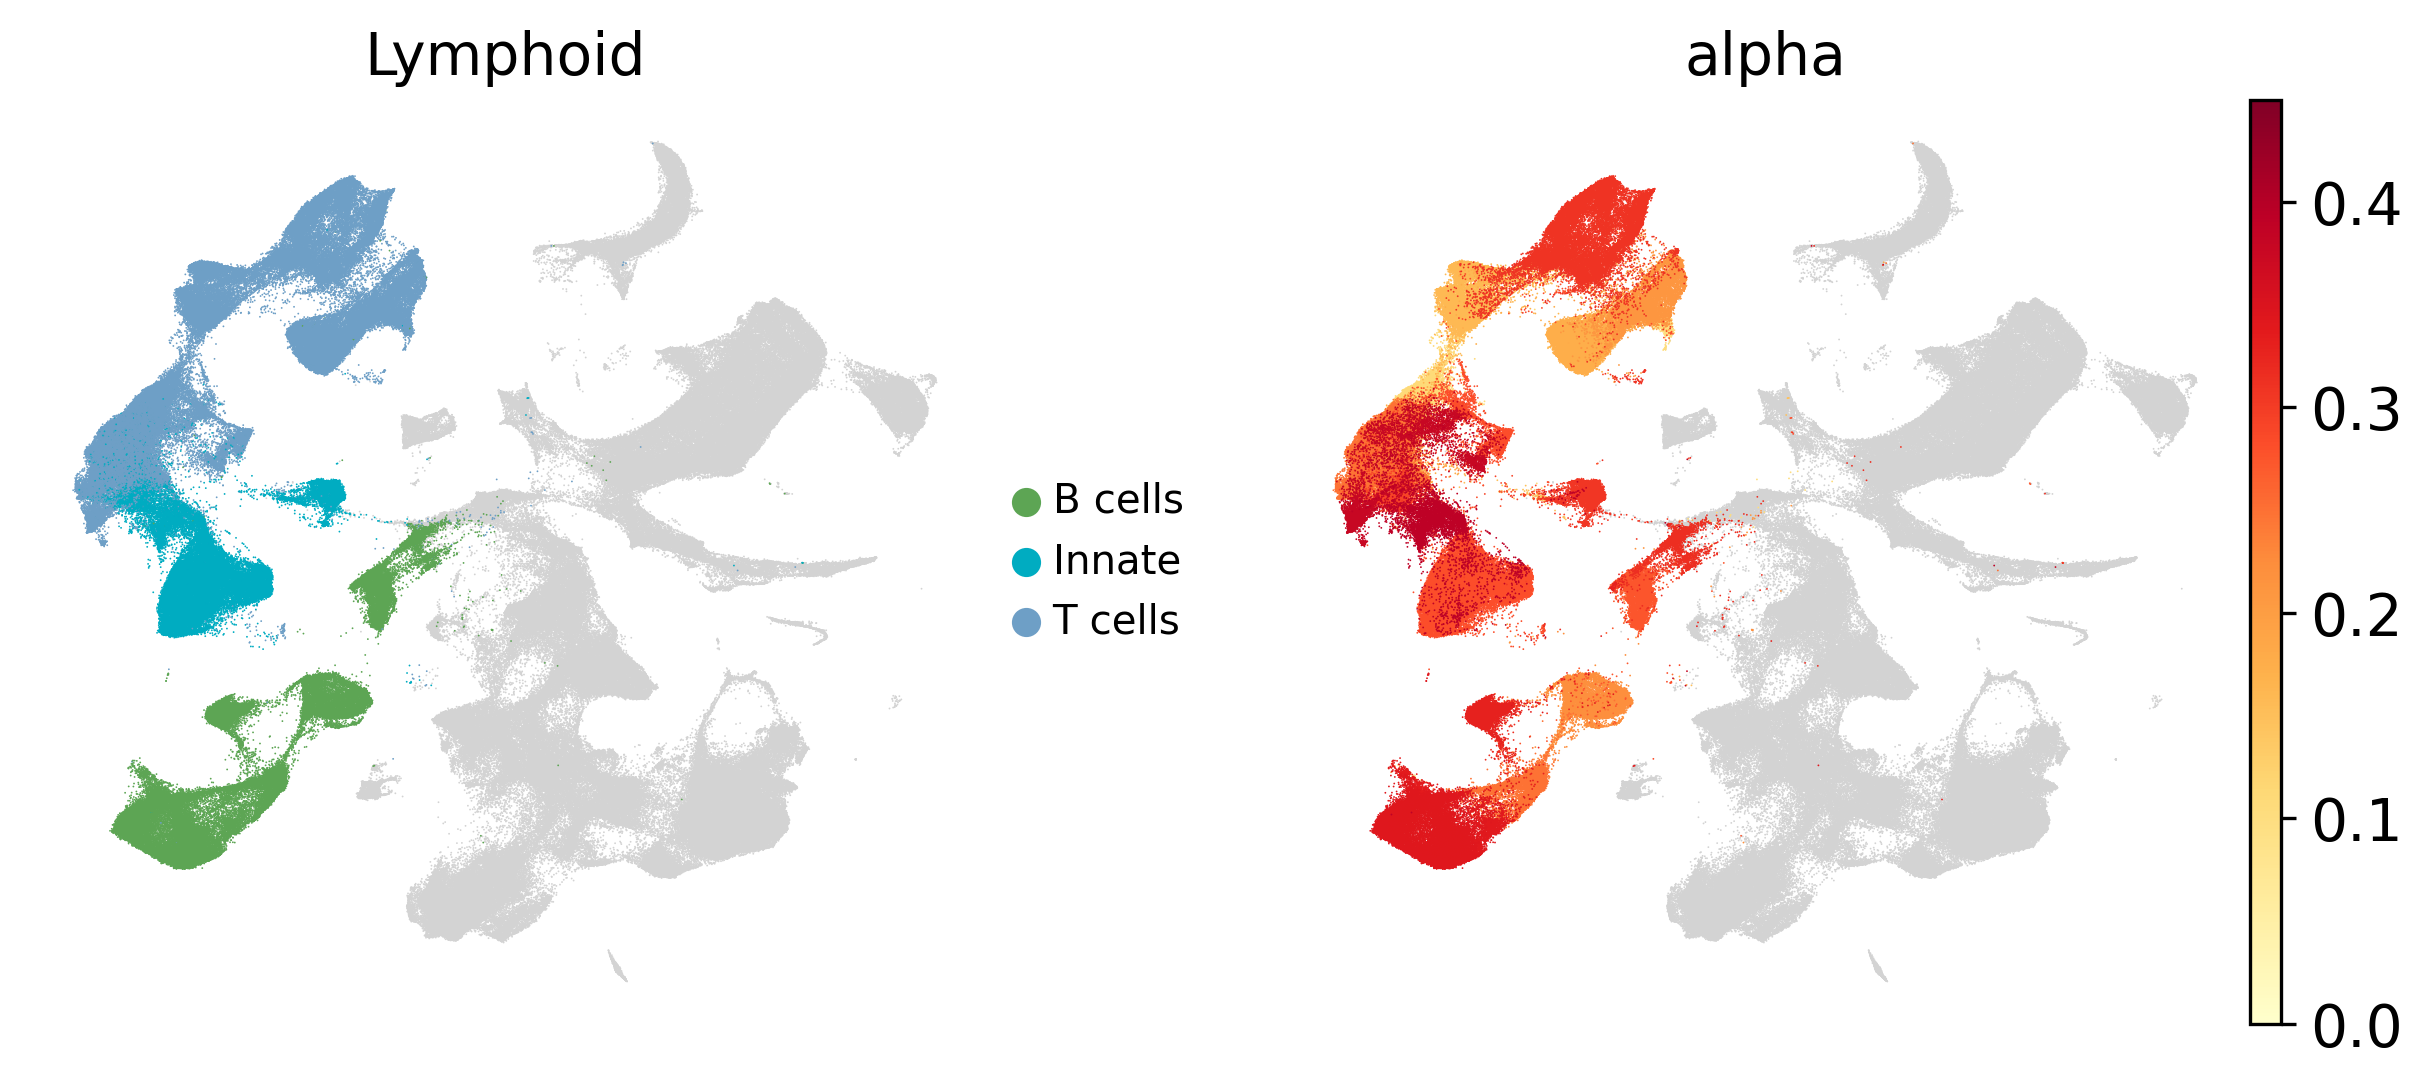

In [22]:
sc.pl.umap(adata, color=["Lymphoid_anno", "alpha"], save= "Lymphoid.svg",
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           palette= {'T cells' : "#6e9fc6","Innate":"#00acc1","B cells":"#5da554"},
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Lymphoid", size = 0.75,
           legend_fontsize= 'x-small', na_in_legend = False )

### Innate

In [23]:
anno_Innate = {
        ## Lymphoid
    'NK' : "Innate",
    'ILC2' : "Innate",
    'ILC3' : "Innate",
    'TYPE_1_INNATE_T' : "Innate",
    'TYPE_3_INNATE_T' : "Innate",   
}

In [24]:
adata.obs['Innate_anno'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['Innate_anno'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_Innate)
.astype('category')
)

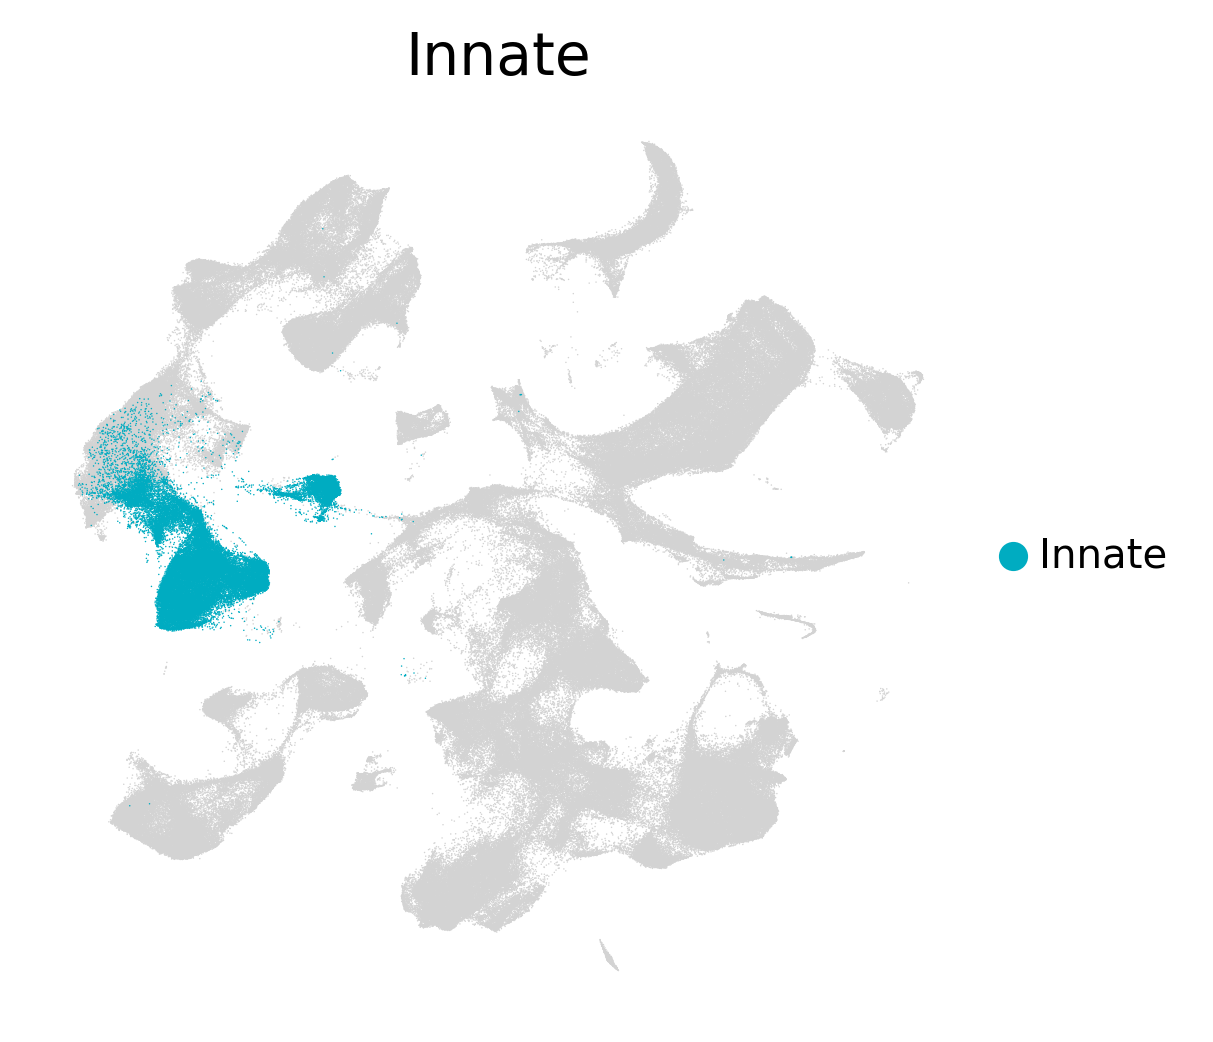

In [25]:
sc.pl.umap(adata, color=["Innate_anno"], save= "Innate.svg",
           palette= {"Innate":"#00acc1"},
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Innate", size = 0.5,
           legend_fontsize= 'x-small', na_in_legend = False )

## Myeloid

In [26]:
anno_Myeloid = {
    ## Myeloid
    'CMP': "Myeloid Progenitor",
    
    'GMP': "Granulocytes",
    'PROMYELOCYTE': "Granulocytes",
    'MYELOCYTE': "Granulocytes",
    'NEUTROPHIL': "Granulocytes",
    'EOSINOPHIL_BASOPHIL': "Granulocytes",

    'MOP': "Stromal",
    'OSTEOCLAST': "Stromal",
    'MAST_CELL': "Stromal",
    
    'DC_PROGENITOR' : "DCs",
    'PDC': "DCs",
    'AS_DC': "DCs",
    'PRE_DC2': "DCs",
    'DC2': "DCs",
    'DC1': "DCs",
    'MIGRATORY_DC': "DCs",

    'PROMONOCYTE': "Mono/Macrophages",
    'MONOCYTE_I_CXCR4': "Mono/Macrophages",
    'MONOCYTE_II_CCR2': "Mono/Macrophages",
    'MONOCYTE_III_IL1B': "Mono/Macrophages",
    'LANGERHANS_CELLS': "Mono/Macrophages",
    'MACROPHAGE_LYVE1_HIGH': "Mono/Macrophages",
    'MACROPHAGE_IRON_RECYCLING': "Mono/Macrophages",
    'MACROPHAGE_MHCII_HIGH': "Mono/Macrophages",
    'MACROPHAGE_KUPFFER_LIKE': "Mono/Macrophages",
    'MACROPHAGE_TREM2': "Mono/Macrophages"

    }   

In [27]:
adata.obs['Myeloid_anno'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['Myeloid_anno'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_Myeloid)
.astype('category')
)

In [28]:
x = alpha_vals[alpha_vals["line"] == "Myeloid_ALL"]
x['cell'] = x['cell'].str.replace(r"_Myeloid_ALL","").astype('category')
#x

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
adata.obs["alpha"] = float('NaN')
for i in x["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(x["α"][x["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


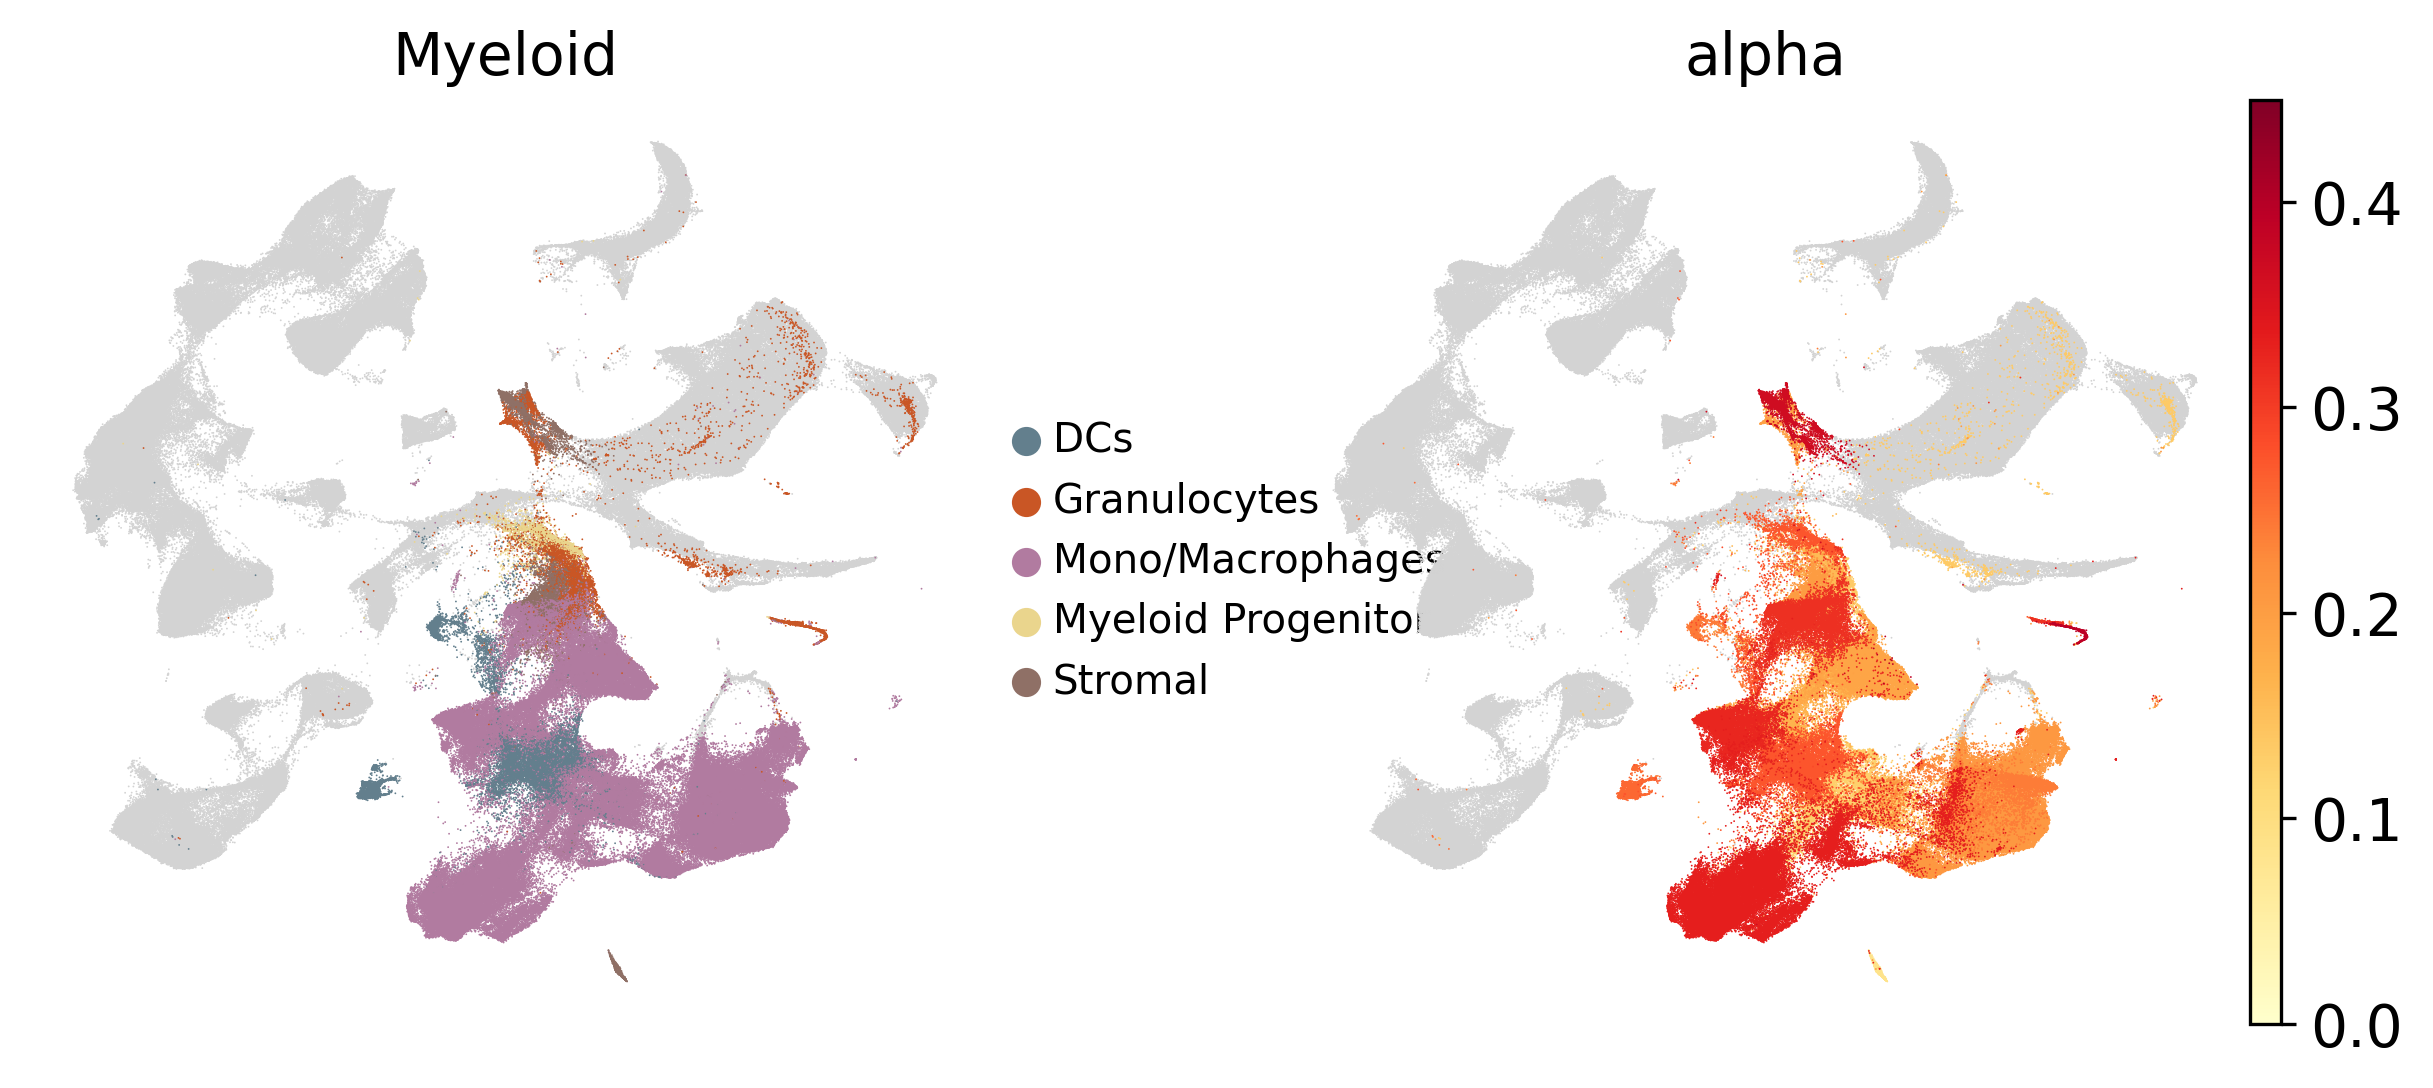

In [30]:
sc.pl.umap(adata, color=["Myeloid_anno", "alpha"], save= "Myeloid_overview.svg",
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           palette= {"Myeloid Progenitor":"#ead58d","Stromal":"#8f7066",
                     "Mono/Macrophages":"#b17ba0","DCs":"#637f8d", "Granulocytes" : "#c95625"},
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Myeloid", size = 0.75,
           legend_fontsize= 'x-small', na_in_legend = False )

## Mega Ery

In [31]:
anno_MegaKEry = {
    ## MegaK Ery
    'MEMP' : 'Myeloid Progenitor',
    'MEP': 'Myeloid Progenitor',
    'EARLY_ERY': 'Erythrocytes',
    'MID_ERY': 'Erythrocytes',
    'LATE_ERY': 'Erythrocytes',
    'YS_ERY': 'Erythrocytes',
    'EARLY_MK': 'MegaKaryocytes',
    'LATE_MK': 'MegaKaryocytes',
    'VSMC_PERICYTE_III': 'Stromal',
    'MACROPHAGE_ERY': 'MegaKaryocytes'
}

In [32]:
adata.obs['MegaKEry_anno'] = adata.obs['anno_lvl_2_final_clean']
adata.obs['MegaKEry_anno'] = (
    adata.obs["anno_lvl_2_final_clean"]
    .map(anno_MegaKEry)
.astype('category')
)

In [33]:
x = alpha_vals[alpha_vals["line"] == "MegaK_Ery"]
x['cell'] = x['cell'].str.replace(r"_MegaK_Ery","").astype('category')
#x

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
adata.obs["alpha"] = float('NaN')
for i in x["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(x["α"][x["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


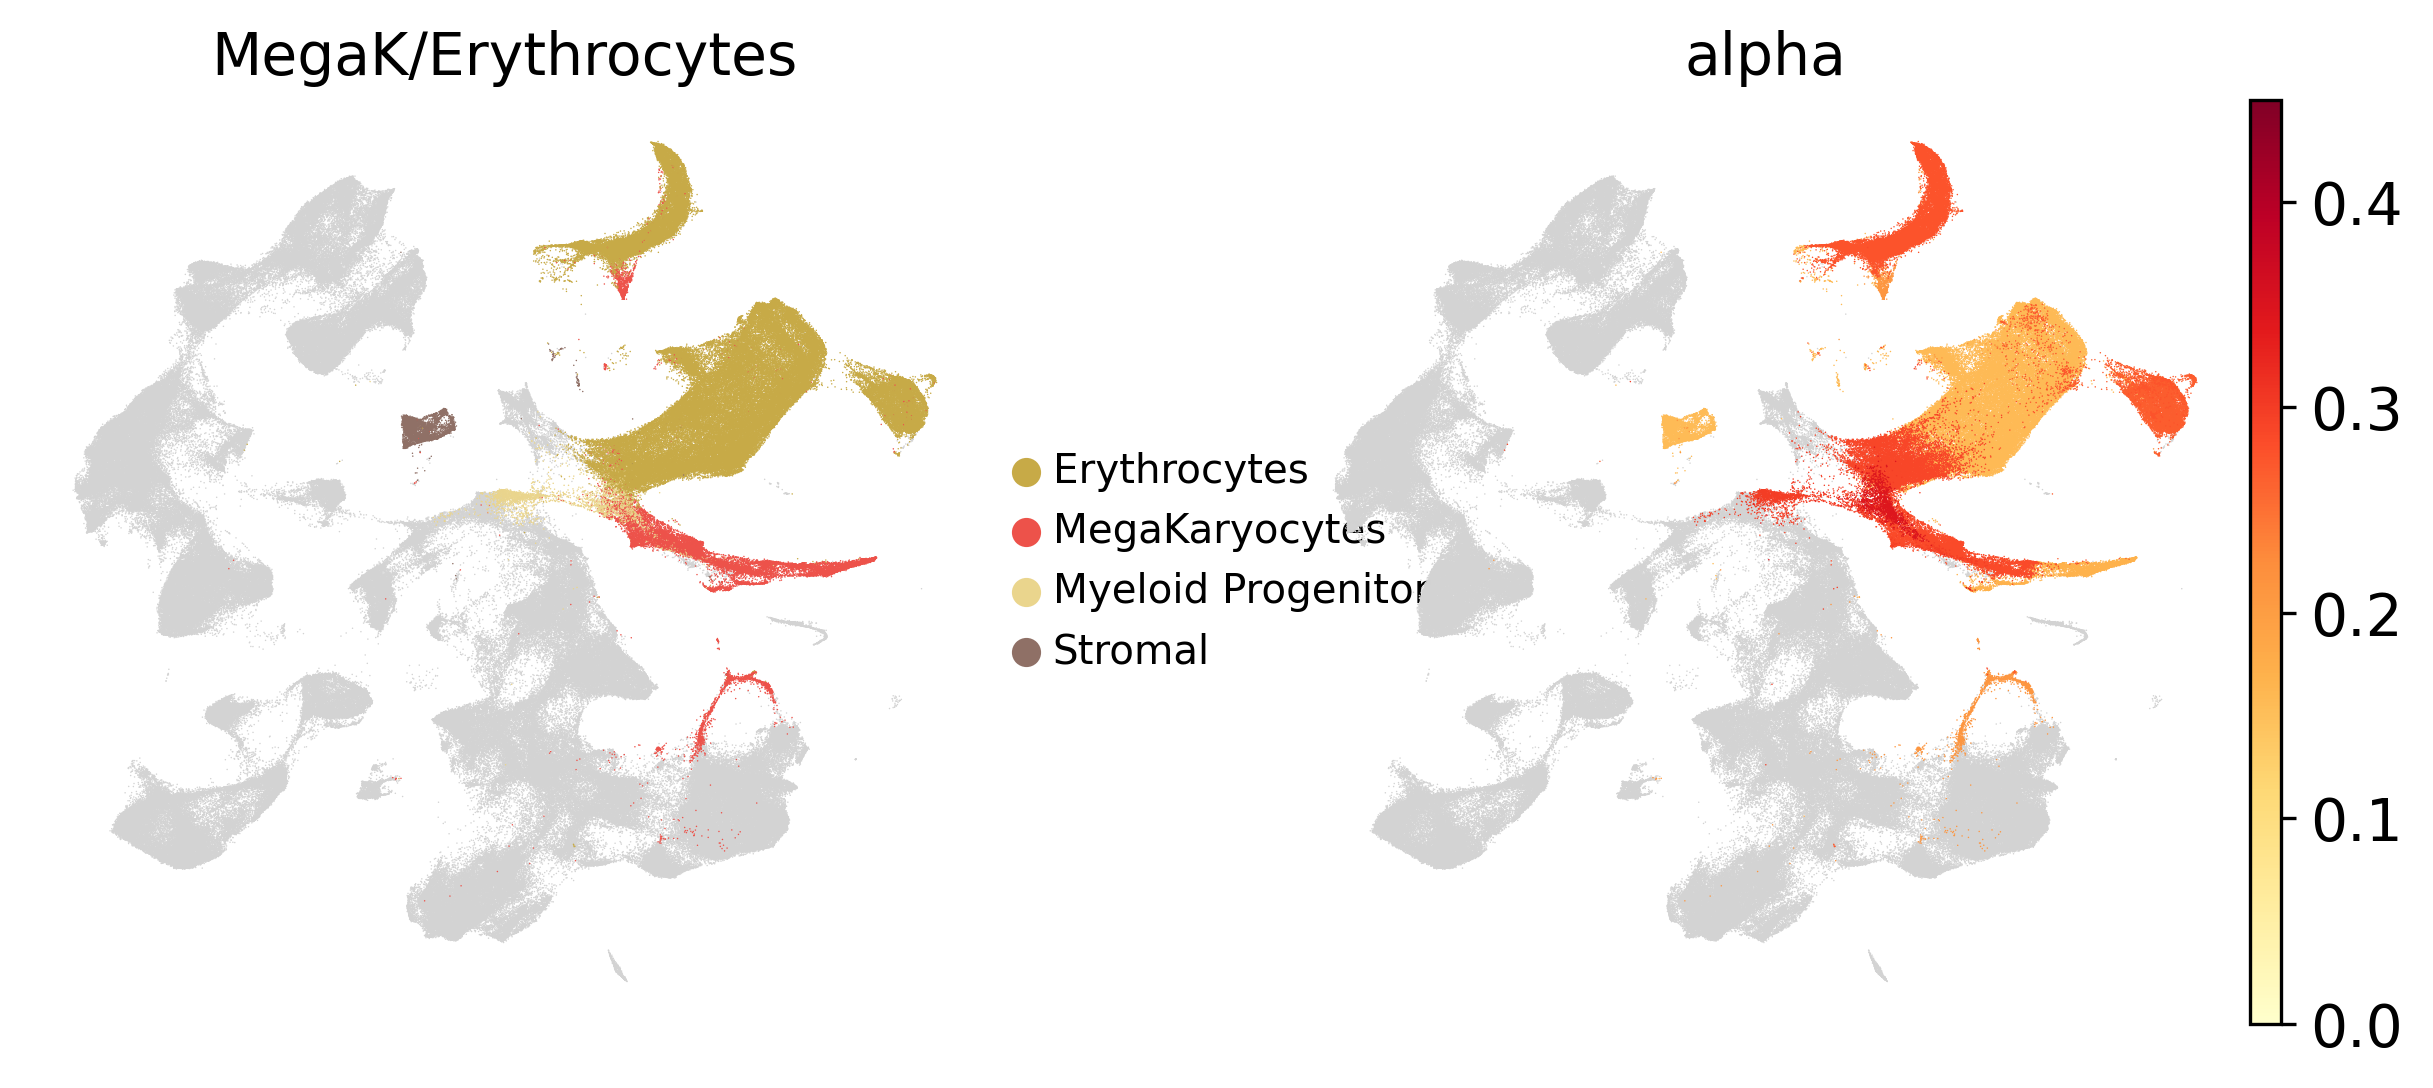

In [35]:
sc.pl.umap(adata, color=["MegaKEry_anno", "alpha"], save= "MegaK_Ery_overview.svg",
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           palette= {"Myeloid Progenitor":"#ead58d","Stromal":"#8f7066",
                     "MegaKaryocytes":"#ed524a","Erythrocytes" : "#c7aa47"},
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "MegaK/Erythrocytes", size = 0.5,
           legend_fontsize= 'x-small', na_in_legend = False )